<a href="https://colab.research.google.com/github/eduardocarbo/NewRepo/blob/master/ArbolDecisionTItanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic - Machine Learning from Disaster
--------------------------------------------------------------------------------

source: https://www.kaggle.com/competitions/titanic/data?select=train.csv


Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

source: https://www.kaggle.com/competitions/titanic/data?select=train.csv

###Data Dictionary

Variable	Definition	Key

survival	Survival	0 = No, 1 = Yes

pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

We import the required libraries:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#To ensure that the charts remain on a single line

The next step is to load the testing and training files.

In [2]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


We are going to load the dataset :

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

We are going to see th header of the training and testing datasets :

In [4]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Search percentage of men and women who survived:

In [14]:
mujeres = train_data.loc[train_data.Sex == 'female']['Survived']
porcentaje_mujeres = sum(mujeres) / len(mujeres)
print(f"% of women who survived: {round(porcentaje_mujeres,2)*100}%")

% of women who survived: 74.0%


In [13]:
hombres = train_data.loc[train_data.Sex == 'male']['Survived']
porcentaje_hombres = sum(hombres) / len(hombres)
print(f"% of men who survived: {round(porcentaje_hombres,2)*100}%")

% of men who survived: 19.0%


Next, we are going to create a histogram:

Text(0.5, 1.0, '< Titanic histogram >')

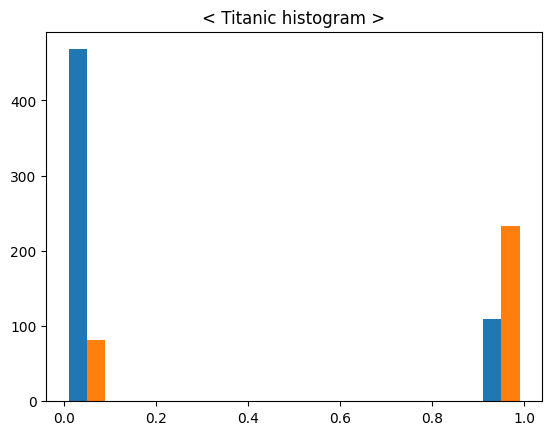

In [21]:
plt.hist(x = [hombres,mujeres])
plt.title("< Titanic histogram >")

If we focus only on the histogram of survival by genderm we find a highly skewed result. This is just a good starting point to understand the dat behavior, nothing more.

In [40]:
y = train_data['Survived']

We have the following columns in the training file.

In [22]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Let´s see which variables we can use:

In [23]:
variables = ['Pclass','Sex','SibSp','Parch','Fare']

Nota: The target variable will be 'Survived'

We are going to remove the Null values in the 'Fare' variable column.

In [27]:
media = train_data['Fare'].mean()
print("THe mean of the values in <Fare> is: ",media)

THe mean of the values in <Fare> is:  32.204207968574636


Delete null values in 'Fare':

In [30]:
train_data['Fare'].replace(np.nan,media,inplace=True)
test_data['Fare'].replace(np.nan,media,inplace=True)

Variable Dummies in Dataset:

In [32]:
X = pd.get_dummies(train_data[variables])
X_test = pd.get_dummies(test_data[variables])

In [33]:
X.head(5)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,1,0,7.2500,0,1
1,1,1,0,71.2833,1,0
2,3,0,0,7.9250,1,0
3,1,1,0,53.1000,1,0
4,3,0,0,8.0500,0,1


###We prepare a  claffication model :

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
modelo = RandomForestClassifier(n_estimators = 25,max_depth = 10,random_state=0)
modelo.fit(X,y)

RandomForestClassifier(max_depth=10, n_estimators=25, random_state=0)

###We obtain predictions

In [42]:
predicciones = modelo.predict(X_test)

In [43]:
predicciones

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

###We create a dataset with the results

In [44]:
salida = pd.DataFrame({
    'Identificador':test_data.PassengerId,
    'Superviviente' : predicciones
})

In [46]:
salida

,Identificador,Superviviente
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
salida.to_csv('resultadoTitanic.csv',index=False)

https://www.youtube.com/watch?v=8HDIq_SrFzI by JOSE OJEDA ROJAS